In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [12]:
df = pd.read_csv("FuelConsumption.csv")

In [13]:
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [5]:
X = df[['ENGINE SIZE']]
y = df['FUEL CONSUMPTION']

In [322]:
y

0      10.5
1       9.8
2      13.7
3      15.0
4      11.4
       ... 
634    14.4
635    13.6
636    13.9
637    13.0
638    14.7
Name: FUEL CONSUMPTION, Length: 639, dtype: float64

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size=0.15)

In [324]:
# x_train.reshape(-1, 1)
X_train.shape

(543, 1)

In [325]:
X_test.shape

(96, 1)

In [326]:
y_train.shape

(543,)

In [327]:
y_test.shape

(96,)

In [328]:
model = LinearRegression()

In [329]:
model.fit(X_train, y_train)

LinearRegression()

In [330]:
predicted_fuel_consumption = model.predict(X_test)

In [331]:
predicted_fuel_consumption

array([13.64233313, 13.41167649, 10.87445348, 17.7941526 , 13.64233313,
       11.33576676, 19.63940569, 14.1036464 , 18.71677914, 17.10218268,
       15.02627295, 12.25839331, 12.71970658, 18.71677914, 16.41021277,
       10.18248357, 17.10218268, 11.79708003, 16.41021277, 16.87152605,
       19.63940569, 19.17809242, 15.25692959, 14.1036464 , 18.25546587,
       16.41021277, 17.7941526 , 18.25546587, 11.79708003, 18.25546587,
       11.33576676, 13.64233313, 18.02480923, 15.02627295, 16.41021277,
       15.25692959, 12.25839331, 15.02627295, 12.95036322, 12.48904994,
       19.40874906, 11.33576676, 12.95036322, 10.18248357, 11.33576676,
       17.7941526 , 12.95036322, 17.10218268, 17.7941526 , 15.9488995 ,
       14.56495968, 12.71970658, 18.25546587, 20.79268888, 16.41021277,
       12.95036322, 12.25839331, 17.7941526 , 14.1036464 , 12.71970658,
       14.1036464 , 14.79561631, 12.71970658, 12.48904994, 12.95036322,
       10.87445348, 17.10218268, 12.48904994, 10.18248357, 16.41

In [332]:
mae = mean_absolute_error(y_test, predicted_fuel_consumption)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.9699892282724337


In [333]:

rmse = np.sqrt(mean_squared_error(y_test, predicted_fuel_consumption))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.2111703053303873


In [334]:
coefficients = model.coef_ 
intercept = model.intercept_

In [335]:
coefficients

array([2.30656637])

In [336]:
intercept

7.183947289852626

Text(0, 0.5, 'FUEL CONSUMPTION IN LITRES')

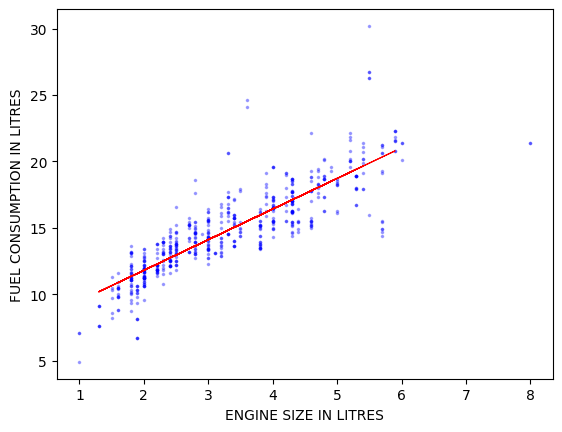

In [340]:
plt.scatter(X, y, color='blue', label='Data points', s=2.5, alpha=0.3)
plt.plot(X_test, predicted_fuel_consumption, color='red',lw=0.8)

plt.xlabel('ENGINE SIZE IN LITRES')
plt.ylabel('FUEL CONSUMPTION IN LITRES')

In [343]:
X2 = df[['COEMISSIONS ']]

In [344]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state = 2, test_size=0.15)

In [345]:
X2

,COEMISSIONS
0,216
1,205
2,265
3,301
4,230
...,...
634,288
635,274
636,274
637,260


In [274]:
model2 = LinearRegression()

In [347]:
model2.fit(X2_train, y_train)

LinearRegression()

In [348]:
fuel_pred_based_on_coem = model2.predict(X2_test)

In [349]:
fuel_pred_based_on_coem

array([12.99953309, 14.94372913, 10.1580158 , 14.74432441, 13.59774726,
       12.80012837, 21.02557315, 13.69744962, 18.73241884, 19.18107947,
       18.28375822, 11.85295594, 11.65355122, 18.28375822, 17.03747871,
        9.46009928, 19.08137711, 13.24878899, 14.84402677, 18.53301412,
       18.03450232, 19.18107947, 14.4950685 , 15.89090156, 18.18405586,
       14.14611024, 14.74432441, 19.43033537, 12.4511701 , 20.1282519 ,
       12.89983073, 15.19298503, 18.03450232, 16.43926454, 15.29268739,
       18.28375822, 12.89983073, 15.54194329, 13.79715198, 13.69744962,
       19.43033537, 11.05533705, 14.59477086,  7.71530796, 11.75325358,
       18.98167475, 12.30161656, 17.13718107, 17.13718107, 13.24878899,
       13.59774726, 12.55087247, 16.58881808, 20.67661488, 16.68852045,
       12.80012837, 13.14908663, 19.43033537, 13.34849135, 14.04640788,
       13.14908663, 17.73539524, 12.30161656, 12.2019142 , 17.73539524,
       10.1580158 , 17.58584169, 10.95563469,  7.71530796, 16.68

In [350]:
mae = mean_absolute_error(y_test, fuel_pred_based_on_coem)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.3660886906780853


In [351]:
rmse = np.sqrt(mean_squared_error(y_test, fuel_pred_based_on_coem))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.4594878299146248


In [352]:
coefficients2 = model2.coef_ 
intercept2 = model2.intercept_

In [353]:
coefficients2

array([0.04985118])

In [354]:
intercept2

-0.06147619659866166

Text(0, 0.5, 'FUEL CONSUMPTION IN LITRES')

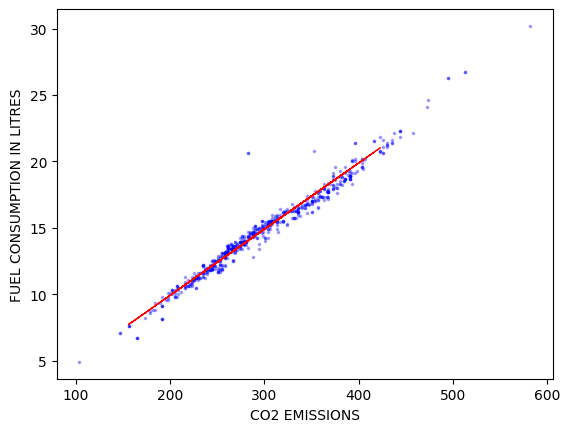

In [356]:
plt.scatter(X2, y, color='blue', label='Data points', s=2.5, alpha=0.3)
plt.plot(X2_test, fuel_pred_based_on_coem, color='red',lw=0.8)

plt.xlabel('CO2 EMISSIONS')
plt.ylabel('FUEL CONSUMPTION IN LITRES')

In [358]:
print(f'model score ${model2.score(X2_test, y_test)}')

model score $0.97606246124563


In [360]:
print(f'model score ${model.score(X_test, y_test)}')

model score $0.8336809876437888


In [1]:
#MULTIPLE LINEAR REGRESSION

In [29]:
X3 = df[['ENGINE SIZE', 'CYLINDERS','COEMISSIONS ']]

In [30]:
model3 = LinearRegression()

In [31]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, random_state = 2, test_size=0.15)
y_train = y_train.ravel()

In [32]:
y_train.shape

(543,)

In [33]:
model3.fit(X3_train, y_train)

LinearRegression()

In [34]:
fuel_consumption_prediction = model3.predict(X3_test)

In [36]:
mae = mean_absolute_error(y_test, fuel_consumption_prediction)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.3392969850930398


In [37]:
rmse = np.sqrt(mean_squared_error(y_test, fuel_consumption_prediction))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.423112853688854


In [38]:
coefficients3 = model3.coef_ 
intercept3 = model3.intercept_

In [40]:
print(f'model score ${model3.score(X3_test, y_test)}')

model score $0.9797024366234703


In [41]:
coefficients3

array([-0.06194761,  0.26142136,  0.04563922])

In [42]:
intercept3

-0.13004641044378928

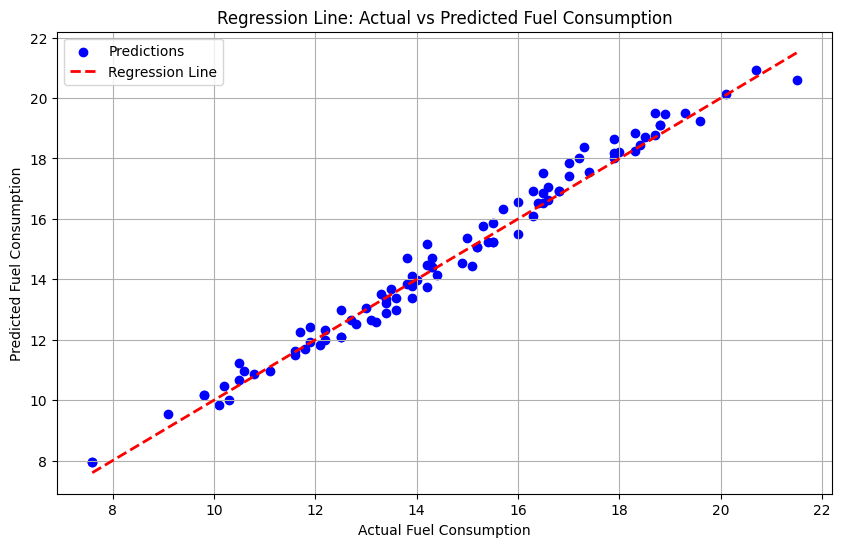

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, fuel_consumption_prediction, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Regression Line')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.title('Regression Line: Actual vs Predicted Fuel Consumption')
plt.legend()
plt.grid()
plt.show()

In [19]:
avg_fuel_consumption = df["FUEL CONSUMPTION"].mean()
df["FUEL_CONSUMPTION_LABEL"] = df["FUEL CONSUMPTION"].apply(lambda x: 1 if x > avg_fuel_consumption else 0)

In [45]:
X = df[["ENGINE SIZE", "COEMISSIONS "]]
y = df["FUEL_CONSUMPTION_LABEL"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
svm_model = SVC(kernel="linear",random_state=2)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=2)

In [55]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        65
           1       0.95      0.95      0.95        63

    accuracy                           0.95       128
   macro avg       0.95      0.95      0.95       128
weighted avg       0.95      0.95      0.95       128



In [56]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.21650635094610965


In [57]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.046875


In [58]:
accuracy = svm_model.score(X_test, y_test)
print("Model Accuracy (using .score):", accuracy)

Model Accuracy (using .score): 0.953125


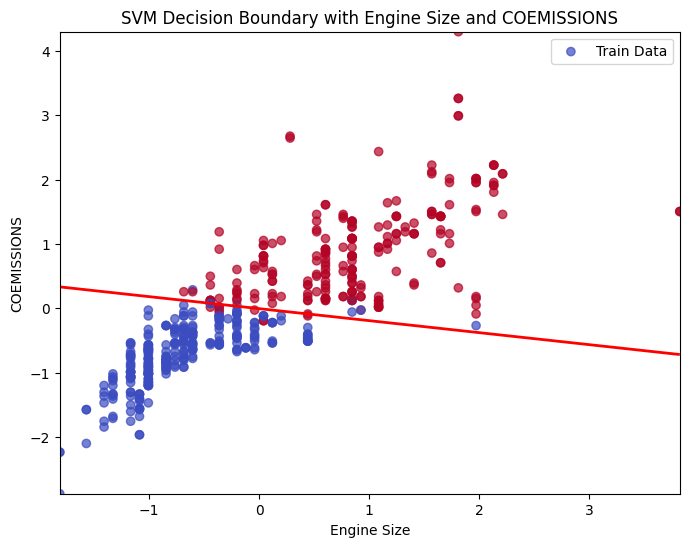

In [59]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train Data', alpha=0.7)

xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))

Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='red', linewidths=2)

plt.title('SVM Decision Boundary with Engine Size and COEMISSIONS')
plt.xlabel('Engine Size')
plt.ylabel('COEMISSIONS')

plt.legend(loc='best')
plt.show()